In [1]:
import sys
import re
import time
import datetime
import pandas as pd
import numpy as np
import func
# inline plot
import matplotlib.pyplot as plt
%matplotlib inline

/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv("data/merged_concat_final.csv",sep='\t',error_bad_lines=False)

/Users/albarron/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,Unnamed: 0,train_id,stop_pa,t_northbound,temp,precipiation,visability,windspeed,humidity,cloudcover,...,is_mechanical,is_customer,is_event,d_monday,d_tuesday,d_wednesday,d_thursday,d_friday,d_saturday,d_sunday
count,21021.00000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,20930.000000,...,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000,21021.000000
mean,10510.00000,244.307692,0.934066,0.505495,61.473913,0.001153,9.694420,6.252455,0.706762,0.116889,...,0.014937,0.007469,0.003568,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,6068.38434,75.444909,0.248173,0.499982,8.536195,0.004429,0.614016,1.836916,0.093340,0.070111,...,0.121305,0.086100,0.059626,0.349935,0.349935,0.349935,0.349935,0.349935,0.349935,0.349935
min,0.00000,101.000000,0.000000,0.000000,39.062917,0.000000,7.027083,2.636250,0.351250,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5255.00000,194.000000,1.000000,0.000000,54.358750,0.000000,9.734167,4.836800,0.653333,0.060000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10510.00000,236.000000,1.000000,1.000000,64.510833,0.000000,9.992083,6.349167,0.713750,0.114067,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15765.00000,289.000000,1.000000,1.000000,67.650833,0.000000,10.000000,7.472500,0.765417,0.166250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21020.00000,386.000000,1.000000,1.000000,77.026250,0.046133,10.000000,12.565417,0.924583,0.310000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[['del_min','del_med','del_maj','del_cat']].sum()

In [4]:
del df['Unnamed: 0']

In [5]:
df.shape

(21021, 33)

In [6]:
df.set_index('timestamp')
df['timestamp'] = pd.to_datetime(df['timestamp'],format="%Y-%m-%d %H:%M:%S")

In [7]:
def delay_to_ordinal(r):
    v = 0
    v = 1 if r['del_min'] == 1 else 0
    v = 2 if r['del_med'] == 1 else 0
    v = 3 if r['del_maj'] == 1 else 0
    v = 4 if r['del_cat'] == 1 else 0
    return v

df['ord_del'] = df.apply(lambda x:delay_to_ordinal(x),axis=1)

In [8]:
only_delay = df[(df['is_delay']==1)]

In [9]:
only_delay['ord_del'].unique()

array([0, 4])

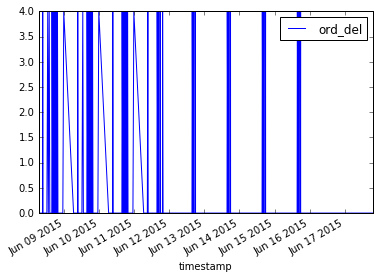

In [10]:
only_delay.plot(x=['timestamp'],y='ord_del')

In [11]:
df.dtypes

train_id                float64
stop_pa                 float64
t_northbound            float64
timestamp        datetime64[ns]
temp                    float64
precipiation            float64
visability              float64
windspeed               float64
humidity                float64
cloudcover              float64
is_bullet                 int64
is_limited                int64
tweet_id                 object
is_delay                  int64
del_min                   int64
del_med                   int64
del_maj                   int64
del_cat                   int64
is_backlog                int64
is_canceled               int64
is_passing                int64
is_accident               int64
is_medical                int64
is_mechanical             int64
is_customer               int64
is_event                  int64
d_monday                  int64
d_tuesday                 int64
d_wednesday               int64
d_thursday                int64
d_friday                  int64
d_saturd

In [12]:
print (df['del_cat'].sum()/float(df['is_delay'].sum()))*100 , '%'

9.53846153846 %


In [13]:
df['timestamp'].dtype

dtype('<M8[ns]')

In [14]:
# Non Delay Specific
features = df.columns.values
X = df[['temp','precipiation',
        'visability','windspeed','humidity','cloudcover',
        'is_bullet','is_limited','t_northbound',
       'd_monday','d_tuesday','d_wednesday','d_thursday','d_friday','d_saturday']]
# del X['is_delay']
# del X['tweet_id']
# X['timestamp'] = X['timestamp'].apply(lambda x: (np.datetime64(x).astype('uint64') / 1e6).astype('uint32'))
y = df['is_delay']

In [15]:
# Non Delay Specific
features = df.columns.values
X = df[['temp','precipiation',
        'visability','windspeed','humidity','cloudcover',
        'is_bullet','is_limited','t_northbound',
       'd_monday','d_tuesday','d_wednesday','d_thursday','d_friday','d_saturday']]
# del X['is_delay']
# del X['tweet_id']
# X['timestamp'] = X['timestamp'].apply(lambda x: (np.datetime64(x).astype('uint64') / 1e6).astype('uint32'))
y = df['is_delay']

In [16]:
# X.fillna(0)
# X.set_index('timestamp')

In [17]:
# X['timestamp'] = X['timestamp'].apply(lambda x:int(x))
# X['stop_pa'] = X['stop_pa'].apply(lambda x:int(x))
# X['train_id'] = X['train_id'].apply(lambda x:int(x))
X['t_northbound'] = X['t_northbound'].apply(lambda x:int(x))
X.dtypes

/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


temp            float64
precipiation    float64
visability      float64
windspeed       float64
humidity        float64
cloudcover      float64
is_bullet         int64
is_limited        int64
t_northbound      int64
d_monday          int64
d_tuesday         int64
d_wednesday       int64
d_thursday        int64
d_friday          int64
d_saturday        int64
dtype: object

In [18]:
# del X['timestamp']


In [19]:
X['cloudcover'].mean()

0.11688896815685519

In [20]:
X['cloudcover'] = X['cloudcover'].fillna(X['cloudcover'].mean())

/Users/albarron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
X.isnull().sum()

temp            0
precipiation    0
visability      0
windspeed       0
humidity        0
cloudcover      0
is_bullet       0
is_limited      0
t_northbound    0
d_monday        0
d_tuesday       0
d_wednesday     0
d_thursday      0
d_friday        0
d_saturday      0
dtype: int64

In [22]:
X_y = df[['is_delay','temp','precipiation',
        'visability','windspeed','humidity','cloudcover',
        'is_bullet','is_limited','t_northbound',
       'd_monday','d_tuesday','d_wednesday','d_thursday','d_friday','d_saturday']]
cr = X_y.corr()
np.round(cr, 4)
# 

,is_delay,temp,precipiation,visability,windspeed,humidity,cloudcover,is_bullet,is_limited,t_northbound,d_monday,d_tuesday,d_wednesday,d_thursday,d_friday,d_saturday
is_delay,1.0000,0.0992,-0.0253,-0.1089,0.0995,0.0548,0.0112,0.4993,0.6565,-0.0042,0.0378,0.0284,0.0111,-0.0172,-0.0187,-0.0187
temp,0.0992,1.0000,-0.2092,0.1197,0.3330,-0.3455,-0.1587,0.0502,0.0667,0.0000,0.0291,0.0153,-0.0073,-0.0066,-0.0055,-0.0195
precipiation,-0.0253,-0.2092,1.0000,-0.4591,0.2003,0.3036,0.3655,-0.0137,-0.0182,0.0000,0.1495,0.0403,-0.0305,-0.0394,-0.0507,-0.0682
visability,-0.1089,0.1197,-0.4591,1.0000,-0.1198,-0.4278,-0.3435,-0.0568,-0.0797,-0.0000,-0.1926,-0.0426,0.0834,0.0288,0.1302,-0.0170
windspeed,0.0995,0.3330,0.2003,-0.1198,1.0000,-0.0040,0.2527,0.0521,0.0706,0.0000,0.0803,0.0459,-0.0104,-0.0430,-0.0406,-0.0745
humidity,0.0548,-0.3455,0.3036,-0.4278,-0.0040,1.0000,0.4875,0.0273,0.0388,-0.0000,0.0289,-0.0012,-0.0128,0.0151,-0.0482,0.0166
cloudcover,0.0112,-0.1587,0.3655,-0.3435,0.2527,0.4875,1.0000,0.0048,0.0072,0.0000,0.0756,-0.0111,-0.0138,-0.0483,-0.0215,-0.0150
is_bullet,0.4993,0.0502,-0.0137,-0.0568,0.0521,0.0273,0.0048,1.0000,-0.0112,-0.0063,0.0197,0.0137,0.0047,-0.0088,-0.0088,-0.0088
is_limited,0.6565,0.0667,-0.0182,-0.0797,0.0706,0.0388,0.0072,-0.0112,1.0000,-0.0010,0.0228,0.0160,0.0071,-0.0109,-0.0109,-0.0109
t_northbound,-0.0042,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0063,-0.0010,1.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000


In [23]:
X_y.sum()

is_delay            650.000000
temp            1292243.119800
precipiation         24.229129
visability       203786.407984
windspeed        131432.855200
humidity          14856.840657
cloudcover         2446.486104
is_bullet           174.000000
is_limited          313.000000
t_northbound      10626.000000
d_monday           3003.000000
d_tuesday          3003.000000
d_wednesday        3003.000000
d_thursday         3003.000000
d_friday           3003.000000
d_saturday         3003.000000
dtype: float64

In [24]:
from sklearn.decomposition import PCA
clf = PCA(.99)
X_trans = clf.fit_transform(X)
X_trans.shape

(21021, 4)

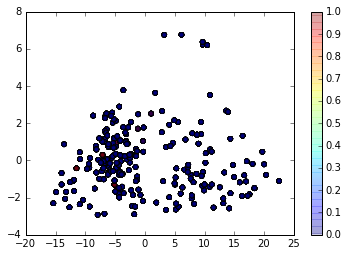

In [25]:

plt.scatter(X_trans[:, 0], X_trans[:, 1],c=y, alpha=0.2)
plt.colorbar();

In [26]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_trans,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(lm,X_trans,y,cv=10).mean()) 
MisClassificationError = 1 - (cross_val_score(lm,X_trans,y,cv=10).mean())
print(MisClassificationError)  #our misclassification Error is 27 percent!

0.962608511333
0.0373914886667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
RFClass = RandomForestClassifier(n_estimators = 10000, 
                                 max_features = 4, # You can set it to a number or 'sqrt', 'log2', etc
                                 min_samples_leaf = 5,
                                 oob_score = True)
RFClass.fit(X,y)
print(RFClass.oob_score_)
scores = cross_val_score(RFClass, X, y, cv=10)
print(scores.mean())
#out of bag error = 25% , CV_error is 35%

In [ ]:
RFClass.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':RFClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

In [ ]:
Depth_Choice_df = pd.DataFrame({'cv_scores': score,'Number of Features': Features})
Depth_Choice_df.plot(x ='Number of Features',y = 'cv_scores')